# BL40A2010 Introduction to IoT-Based Systems

## Assignment 4, 21.2.2023

### Author: Touko Tikkanen

In [ ]:
# installations
! pip install scikit-dsp-comm
! pip install --upgrade numpy
! pip install --upgrade matplotlib
! pip install --upgrade networkx

import networkx as nx 
import matplotlib.pyplot as plt 
import scipy as sp
import numpy as np

**(1) Draw a graph with star topology with five nodes (one in the center $A$, four in the edges $B$-$E$).
If the topology is directed as a many-to-one topology, write the structure of awareness of the system, considering that nodes $B$-$E$ acquire and process data about a supporting reality $T$, while $A$ can only receive data from it. Remember the notation $Xy$ means the image of $X$ by $Y$.**

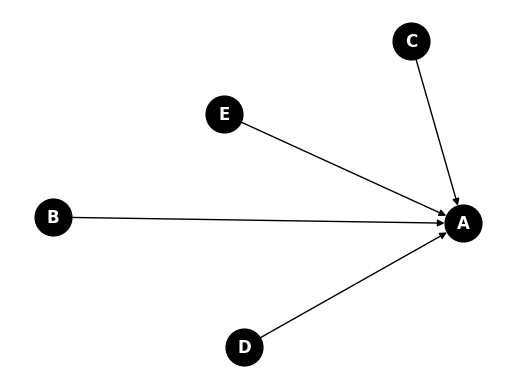

In [3]:
G = nx.Graph()

# 5 node star
G.add_nodes_from(["A", "B", "C", "D", "E"])

G = G.to_directed()

G.add_edge("B", "A")
G.add_edge("C", "A")
G.add_edge("D", "A")
G.add_edge("E", "A")

nx.draw_networkx(G, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.axis('off')
plt.show()

Reflexive system: $\Omega = T+Tb+Tc+Td+Te+Tba+Tca+Tda+Tea = T(1+b+c+d+e+ba+ca+da+ea) $

Therefore the structure of awareness is $\omega = 1+b+c+d+e+ba+ca+da+ea$

**(2) Assume that graph illustrate a scenario of four sensor nodes that also (pre-)process data and one aggregator node as follows. Nodes $B$ and $C$ monitor temperature and wind speed at Airport station in Lappeenranta, respectively. Nodes $D$ and $E$ monitor temperature and wind speed at Lepola station in Lappeenranta, respectively. Nodes $B$ and $D$ send a binary message to $A$ indicating if during that period the temperature was more than $25$ degrees ("1" means above, "0" means below or equal to). Likewise nodes $C$ and $E$ send a binary message to $A$ indicating if during that period the wind speed was more than $5$ m/s ("1" means above, "0" means below or equal to). Download and plot the data from [FMI](http://en.ilmatieteenlaitos.fi/download-observations\#!/) with 1 hour resolution during July, 2018. Using this data, plot the binary signals sent from the nodes $B$-$E$ to the aggregator $A$.**

**(3) Node $A$ needs to identify risky situations in Lappeenranta when the temperature is above $25$ degrees and the wind is above $5$ m/s based on the sensors' signals. If a risky situation is identified at node $A$ as binary number "1" while normal situations as "0". How would you solve this problem? Plot the output signal from node $A$ and discuss its relation to the input signals from $B$-$E$.**